# Extra Material: Direct stiffness method for Finite Element analysis (FEA)

The direct stiffness approach looks at the stiffness of each individual element and adds them to the overall stiffness of the FEA structure. Starting with a single element, show below we have the following relation between forces applied and deformation

![Single link element with forces applied to both ends](../images/link_elem.png)

$\mathbf{F}_{el} = \mathbf{K}_{el}\mathbf{u}$

where 

$\mathbf{F}_{el}=\left[\begin{array}{c}
        F_{1x}\\
        F_{1y}\\
        F_{2x}\\
        F_{2y}\end{array}\right]$

$\mathbf{u}=\left[\begin{array}{c}
        u_{1x}\\
        u_{1y}\\
        u_{2x}\\
        u_{2y}\end{array}\right]$, 
        
and 

$\mathbf{K}_{el}=\frac{EA}{l}\left[\begin{array}{cccc}
        \cos^2\theta & \cos\theta\sin\theta & -\cos^2\theta & -\cos\theta\sin\theta\\
        \cos\theta\sin\theta & \sin^2\theta & -\cos\theta\sin\theta & -\sin^2\theta &\\
        -\cos^2\theta & -\cos\theta\sin\theta & \cos^2\theta & \cos\theta\sin\theta\\
        -\cos\theta\sin\theta & -\sin^2\theta & \cos\theta\sin\theta & \sin^2\theta &\\
        \end{array}\right]$.

For a linear-elastic, small deformation FEA, we assume that the angle $\theta$ remains constant before/after deformation. So our stiffness matrix, $\mathbf{K}_{el}$ is constant once the geometry of the simulation is initialized. So, for a single link element that is deformed by $\mathbf{u}$, the force that is applied to create that deformation is given by our first equation. 

Consider a single aluminum bar $(E=70~GPa)$, with cross-section of $1~mm^2$, and length of 1 meter. If it is initially at an angle of $45^{o}$ pinned at one end and stretched 2 mm to along the x-direction, we have the following deformation and stiffness, 

$\mathbf{u}=\left[\begin{array}{c}
        0\\
        0\\
        2\\
        0\end{array}\right]~mm$, 
        
$\mathbf{K}_{el}=70\frac{N}{mm}\left[\begin{array}{cccc}
        1/2 & 1/2 & -1/2 & -1/2\\
        1/2 & 1/2 & -1/2 & -1/2 &\\
        -1/2 & -1/2 & 1/2 & 1/2\\
        -1/2 & -1/2 & 1/2 & 1/2 &\\
        \end{array}\right]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans'
rcParams['font.size'] = 16
rcParams['lines.linewidth'] = 3

In [2]:
u=np.array([0,0,2,0])
K=70*np.array([[1/2,1/2,-1/2,-1/2],[1/2,1/2,-1/2,-1/2],[-1/2,-1/2,1/2,1/2],[-1/2,-1/2,1/2,1/2]])

In [3]:
F=K@u
print('[F1x, F1y, F2x, F2y] = ',F,'N')

[F1x, F1y, F2x, F2y] =  [-70. -70.  70.  70.] N


So to stretch the 1-meter by $1~mm^2$ link from its initial configuration to the right by 2 mm, it takes a $\mathbf{F}=70\hat{i}+70\hat{j}$ force and a negative $\mathbf{F}$ reaction force.

Text(0.5, 1.0, 'forces and deformation of single Al-bar\nscale factor = 10')

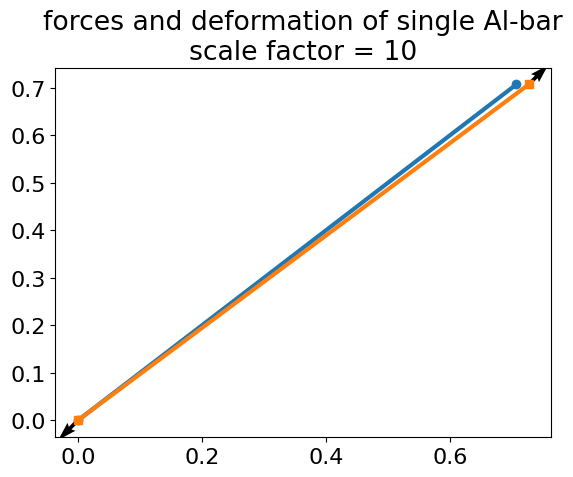

In [4]:
# scale factor
s=10
x0=np.array([0,1/2**0.5])
y0=np.array([0,1/2**0.5])
x=x0+u[0::2]*1e-3*s
y=y0+u[1::2]*1e-3*s

plt.plot(x0,y0,'o-',label='initial position')
plt.plot(x,y,'s-',label='final position')
plt.quiver(x,y,F[0::2]*s,F[1::2]*s)
plt.title('forces and deformation of single Al-bar\nscale factor = {}'.format(s))

## Combining multiple elements

This method can be extended to multiple, connected bars. We just have to do some extra book-keeping. Let's consider the 3-bar element that we used in [02_Gauss_elimination](../notebooks/02_Gauss_elimination.ipynb).

![Triangular truss](../images/truss.png)

We have 3 elements and 3 nodes, so there are 6 degrees of freedom, with 3 constraints. Let's use 1-m aluminum bars with $A=1~mm^2$, but set $\alpha=\beta=60^{o}$. 

Each element still has the stiffness defined above,

$\mathbf{K}_{el}=\frac{EA}{l}\left[\begin{array}{cccc}
        \cos^2\theta & \cos\theta\sin\theta & -\cos^2\theta & -\cos\theta\sin\theta\\
        \cos\theta\sin\theta & \sin^2\theta & -\cos\theta\sin\theta & -\sin^2\theta &\\
        -\cos^2\theta & -\cos\theta\sin\theta & \cos^2\theta & \cos\theta\sin\theta\\
        -\cos\theta\sin\theta & -\sin^2\theta & \cos\theta\sin\theta & \sin^2\theta &\\
        \end{array}\right]$, 

but there are two extra things to consider. The angle $\theta$ is different for each bar, and the connections are in different locations for each bar. 

so if the initial geometry, $\mathbf{r}$, is 

$\mathbf{r}=\left[\begin{array}{c}
        x_1\\
        y_{1}\\
        x_{2}\\
        y_{2}\\
        x_3 \\
        y_3\end{array}\right]=
        \left[\begin{array}{c}
        0\\
        0\\
        0.5 \\
        \sqrt{3}/2\\
        1 \\
        0\end{array}\right]~m$

then, the displacement, 

$\mathbf{u}=\left[\begin{array}{c}
        u_{1x}\\
        u_{1y}\\
        u_{2x}\\
        u_{2y}\\
        u_{3x}\\
        u_{3y}\end{array}\right]=
        \left[\begin{array}{c}
        0\\
        0\\
        u_{2x}\\
        u_{2y}\\
        u_{3x}\\
        0\end{array}\right]$,

The forces applied at each joint must equal the sum of the terms 

$\mathbf{F} = \mathbf{K_1 u}+\mathbf{K_2 u}+\mathbf{K_3 u}$

where, $\mathbf{K_i}$ is the stiffness of the structure due to element $\mathbf{i}$, as such

$\mathbf{K}_{1}=\frac{EA}{l}\left[\begin{array}{cccc}
        \cos^2\theta_1 & \cos\theta_1\sin\theta_1 & 0 & 0 & -\cos^2\theta_1 & -\cos\theta_1\sin\theta_1 \\
        \cos\theta_1\sin\theta_1 & \sin^2\theta_1 & 0 & 0 & -\cos\theta_1\sin\theta_1 & -\sin^2\theta_1 \\
        0 & 0 & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & 0 & 0 \\
        -\cos^2\theta_1 & -\cos\theta_1\sin\theta_1 & 0 & 0 & \cos^2\theta_1 & \cos\theta_1\sin\theta_1 \\
        -\cos\theta_1\sin\theta_1 & -\sin^2\theta_1 & 0 & 0 & \cos\theta_1\sin\theta_1 & \sin^2\theta_1 \\
        \end{array}\right]$

$\mathbf{K}_{2}=\frac{EA}{l}\left[\begin{array}{cccc}
        \cos^2\theta_2 & \cos\theta_2\sin\theta_2 & -\cos^2\theta_2 & -\cos\theta_2\sin\theta_2 & 0 & 0\\
        \cos\theta_2\sin\theta_2 & \sin^2\theta_2 & -\cos\theta_2\sin\theta_2 & -\sin^2\theta_2 & 0 & 0\\
        -\cos^2\theta_2 & -\cos\theta_2\sin\theta_2 & \cos^2\theta_2 & \cos\theta_2\sin\theta_2 & 0 & 0\\
        -\cos\theta_2\sin\theta_2 & -\sin^2\theta_2 & \cos\theta_2\sin\theta_2 & \sin^2\theta_2  & 0 & 0\\
        0 & 0 & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & 0 & 0 
        \end{array}\right]$

$\mathbf{K}_{3}=\frac{EA}{l}\left[\begin{array}{cccc}
        0 & 0 & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & 0 & 0 \\
        0 & 0 &\cos^2\theta_3 & \cos\theta_3\sin\theta_3 & -\cos^2\theta_3 & -\cos\theta_3\sin\theta_3 \\
        0 & 0 &\cos\theta_3\sin\theta_3 & \sin^2\theta_3 & -\cos\theta_3\sin\theta_3 & -\sin^2\theta_3 \\
        0 & 0 &-\cos^2\theta_3 & -\cos\theta_3\sin\theta_3 & \cos^2\theta_3 & \cos\theta_3\sin\theta_3 \\
        0 & 0 &-\cos\theta_3\sin\theta_3 & -\sin^2\theta_3 & \cos\theta_3\sin\theta_3 & \sin^2\theta_3 \\
        \end{array}\right]$

In [5]:
Ke1 = lambda a: np.array([[np.cos(a)**2,np.cos(a)*np.sin(a)],[np.cos(a)*np.sin(a),np.sin(a)**2]])
Ke2 = lambda a: np.array([[-np.cos(a)**2,-np.cos(a)*np.sin(a)],[-np.cos(a)*np.sin(a),-np.sin(a)**2]])

K1 = np.zeros((6,6))
K2 = np.zeros((6,6))
K3 = np.zeros((6,6))

K1[0:2,0:2]=Ke1(0)
K1[4:6,4:6]=Ke1(0)
K1[0:2,4:6]=Ke2(0)
K1[4:6,0:2]=Ke2(0)
K2[0:4,0:4]=np.block([[Ke1(np.pi/3),Ke2(np.pi/3)],[Ke2(np.pi/3),Ke1(np.pi/3)]])
K3[2:6,2:6]=np.block([[Ke1(2*np.pi/3),Ke2(2*np.pi/3)],[Ke2(2*np.pi/3),Ke1(2*np.pi/3)]])
print(K1)

[[ 1.  0.  0.  0. -1. -0.]
 [ 0.  0.  0.  0. -0. -0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [-1. -0.  0.  0.  1.  0.]
 [-0. -0.  0.  0.  0.  0.]]


In [6]:
E=70e3
A=1
l=1e3
K = E*A/l*(K1+K2+K3)
for k in K:
    print(k)

[ 87.5         30.31088913 -17.5        -30.31088913 -70.
   0.        ]
[ 30.31088913  52.5        -30.31088913 -52.5          0.
   0.        ]
[-1.75000000e+01 -3.03108891e+01  3.50000000e+01  1.55431223e-14
 -1.75000000e+01  3.03108891e+01]
[-3.03108891e+01 -5.25000000e+01  1.55431223e-14  1.05000000e+02
  3.03108891e+01 -5.25000000e+01]
[-70.           0.         -17.5         30.31088913  87.5
 -30.31088913]
[  0.           0.          30.31088913 -52.5        -30.31088913
  52.5       ]


In [7]:
ufree=np.linalg.solve(K[2:5,2:5],np.ones(3)*70)

In [8]:
np.linalg.cond(K[2:5,2:5])

4.52921099245176

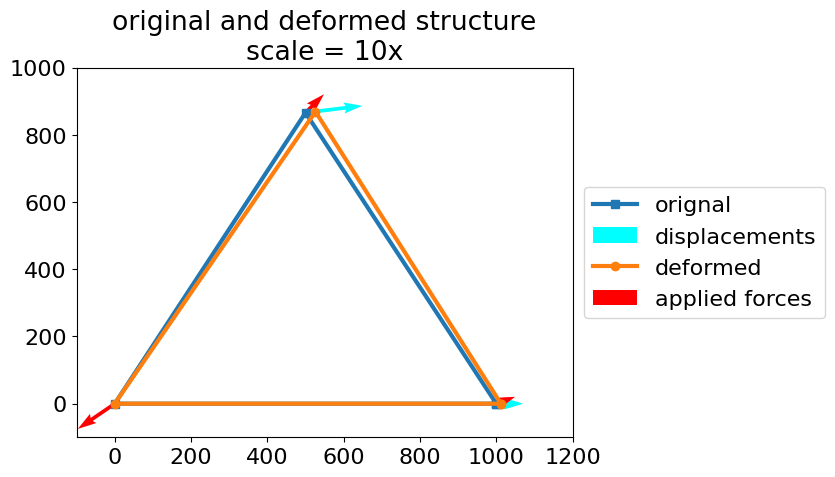

In [9]:
scale = 10
r0=np.array([0,0,0.5,3**0.5/2,1,0])*1000
u=np.zeros((6))
u[2:5]=ufree
ix=range(-2,6,2)
iy=range(-1,6,2)
F=K@u
r=r0+u*scale

plt.figure()
plt.plot(r0[ix],r0[iy],'s-',label='orignal')
plt.quiver(r0[ix],r0[iy],u[ix],u[iy],color=(0,1,1,1),label='displacements')
plt.plot(r[ix],r[iy],'o-',label='deformed')
plt.quiver(r0[ix],r0[iy],F[ix],F[iy],color=(1,0,0,1),label='applied forces')
plt.axis([-100,1200,-100,1000])
plt.legend(loc='center left', bbox_to_anchor=(1,0.5));
plt.title('original and deformed structure\nscale = {}x'.format(scale));

## Project Matrix creation

In the project, we have 7 joints _(nodes)_ and 11 bars _(elements)_. That means we have 7 locations where $\sum\mathbf{F} = \mathbf{0}$ and 11 stiffness matrices $(\mathbf{K_1}...\mathbf{K_{11}})$. The result is 14 equations with 14 unknowns, but we have some constraints on the system. $u_{1x}=u_{1y}=0$ and $u_{7y}=0.$ Which leaves us with 11 unknowns. There are 14 applied forces $(F_{ix},~F_{iy})$ that make up the vector $\mathbf{F}.$

$\mathbf{u}=\left[\begin{array}{c}
        u_{1x}\\
        u_{1y}\\
        u_{2x}\\
        u_{2y}\\
        u_{3x}\\
        u_{3y}\\
        u_{4x}\\
        u_{4y}\\
        u_{5x}\\
        u_{5y}\\
        u_{6x}\\
        u_{6y}\\
        u_{7x}\\
        u_{7y}\\\end{array}\right]=
        \left[\begin{array}{c}
        0\\
        0\\
        u_{2x}\\
        u_{2y}\\
        u_{3x}\\
        u_{3y}\\
        u_{4x}\\
        u_{4y}\\
        u_{5x}\\
        u_{5y}\\
        u_{6x}\\
        u_{6y}\\
        u_{7x}\\
        0\\\end{array}\right]$, and $\mathbf{F} = \mathbf{K_1 u}+...+\mathbf{K_{11} u}$

## Node and element arrays

In FEA, we typically store the node locations and their connections in two arrays called the node array: `nodes` and the element array: `elems`. The array `nodes` stores the node number and its x-y location. The array `elems` stores the node numbers that define each element. Our `nodes` and `elems` are printed below.

In [10]:
l=300 # mm
nodes = np.array([[1,0,0],[2,0.5,3**0.5/2],[3,1,0],[4,1.5,3**0.5/2],[5,2,0],[6,2.5,3**0.5/2],[7,3,0]])
nodes[:,1:3]*=l
elems = np.array([[1,1,2],[2,2,3],[3,1,3],[4,2,4],[5,3,4],[6,3,5],[7,4,5],[8,4,6],[9,5,6],[10,5,7],[11,6,7]])
print('node array\n---------------')
print(nodes)
print('element array\n---------------')
print(elems)

node array
---------------
[[  1.           0.           0.        ]
 [  2.         150.         259.80762114]
 [  3.         300.           0.        ]
 [  4.         450.         259.80762114]
 [  5.         600.           0.        ]
 [  6.         750.         259.80762114]
 [  7.         900.           0.        ]]
element array
---------------
[[ 1  1  2]
 [ 2  2  3]
 [ 3  1  3]
 [ 4  2  4]
 [ 5  3  4]
 [ 6  3  5]
 [ 7  4  5]
 [ 8  4  6]
 [ 9  5  6]
 [10  5  7]
 [11  6  7]]


We can plot the mesh in different ways, here I have chosen to loop through each triangle in the mesh, $node~1\rightarrow node~2\rightarrow node~3 \rightarrow node~1 \rightarrow node~2 \rightarrow node~3 \rightarrow ...$

I create an array where each column is a loop around each triangle in the support structure for the x- and y-coords, `ix` and `iy`, respectively. 

The vector `r` is the coordinates for the structure, so $\mathbf{r} = \mathbf{r}_0+\mathbf{u}$, where $\mathbf{r}_0$ is the location of each node without forces applied and $\mathbf{u}$ is the distance each node moves after a force is applied.

In [11]:
ix = 2*np.block([[np.arange(0,5)],[np.arange(1,6)],[np.arange(2,7)],[np.arange(0,5)]])
iy = ix+1

r = np.block([n[1:3] for n in nodes])
r

array([  0.        ,   0.        , 150.        , 259.80762114,
       300.        ,   0.        , 450.        , 259.80762114,
       600.        ,   0.        , 750.        , 259.80762114,
       900.        ,   0.        ])

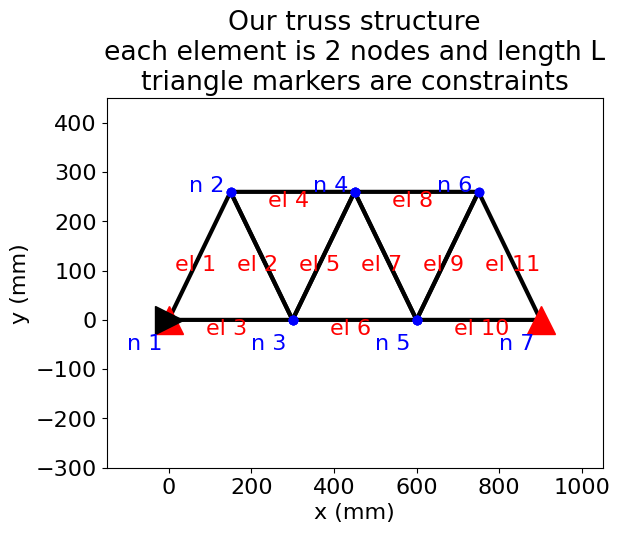

In [12]:
plt.plot(r[ix],r[iy],'-',color='k')
plt.plot(r[ix],r[iy],'o',color='b')
plt.plot(r[0],r[1],'^',color='r',markersize=20)
plt.plot(r[0],r[1],'>',color='k',markersize=20)
plt.plot(r[-2],r[-1],'^',color='r',markersize=20)
# label the nodes
for n in nodes:
    if n[2]>0.8*l: offset=0.1
    else: offset=-l/5
    plt.text(n[1]-l/3,n[2]+offset,'n {}'.format(int(n[0])),color='b')
# label the elements
for e in elems:
    n1=nodes[e[1]-1]
    n2=nodes[e[2]-1]
    x=np.mean([n2[1],n1[1]])
    y=np.mean([n2[2],n1[2]])
    # ----------------->need elem labels<-----------------
    plt.text(x-l/5,y-l/10,'el {}'.format(int(e[0])),color='r')
plt.title('Our truss structure\neach element is 2 nodes and length L\ntriangle markers are constraints')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.axis(l*np.array([-0.5,3.5,-1,1.5]));

## Assemble the stiffness matrix

Creating the matrix to represent $\mathbf{K} = \mathbf{K}_1+...\mathbf{K}_{11}$ is called __assembling the stiffness matrix__. We loop through each element and add the individual stiffness matrices, the same way we did for the 3-element truss above. First, we define our $\mathbf{K_{el}}$ function, `Kel(node1,node2)`. The nodes define the initial length and the angle of the beam element. We can multipy the stiffness matrix by $EA$ to get the actual N/m stiffness term. In our case, each beam is the same material and cross section, so we can factor out $EA$.

In [13]:
def Kel(node1,node2):
    '''Kel(node1,node2) returns the diagonal and off-diagonal element stiffness matrices based upon
    initial angle of a beam element and its length the full element stiffness is
    K_el = np.block([[Ke1,Ke2],[Ke2,Ke1]])
    
    Out: [Ke1 Ke2]
         [Ke2 Ke1]   
    arguments:
    ----------
    node1: is the 1st node number and coordinates from the nodes array
    node2: is the 2nd node number and coordinates from the nodes array
    outputs:
    --------
    Ke1 : the diagonal matrix of the element stiffness
    Ke2 : the off-diagonal matrix of the element stiffness
    '''
    a = np.arctan2(node2[2]-node1[2],node2[1]-node1[1])
    l = np.sqrt((node2[2]-node1[2])**2+(node2[1]-node1[1])**2)
    Ke1 = 1/l*np.array([[np.cos(a)**2,np.cos(a)*np.sin(a)],[np.cos(a)*np.sin(a),np.sin(a)**2]])
    Ke2 = 1/l*np.array([[-np.cos(a)**2,-np.cos(a)*np.sin(a)],[-np.cos(a)*np.sin(a),-np.sin(a)**2]])
    return Ke1,Ke2

Next, we loop through each element (1-11) and add each element stiffness term to the _global_ stiffness matrix, $\mathbf{K}$. The result is a $14\times 14$ array that satisfies our $\sum \mathbf{F} = \mathbf{0}$ at all 7 nodes. 

$\mathbf{F} = \mathbf{Ku}$

In [14]:
K=np.zeros((len(nodes)*2,len(nodes)*2))
for e in elems:
    ni = nodes[e[1]-1]
    nj = nodes[e[2]-1]
    
    Ke1,Ke2 = Kel(ni,nj)
    #--> assemble K <--
    i1=int(ni[0])*2-2
    i2=int(ni[0])*2
    j1=int(nj[0])*2-2
    j2=int(nj[0])*2
    
    K[i1:i2,i1:i2]+=Ke1
    K[j1:j2,j1:j2]+=Ke1
    K[i1:i2,j1:j2]+=Ke2
    K[j1:j2,i1:i2]+=Ke2

In [15]:
print(K*1000)

[[ 4.16666667  1.44337567 -0.83333333 -1.44337567 -3.33333333  0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 1.44337567  2.5        -1.44337567 -2.5         0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [-0.83333333 -1.44337567  5.          0.         -0.83333333  1.44337567
  -3.33333333  0.          0.          0.          0.          0.
   0.          0.        ]
 [-1.44337567 -2.5         0.          5.          1.44337567 -2.5
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [-3.33333333  0.         -0.83333333  1.44337567  8.33333333  0.
  -0.83333333 -1.44337567 -3.33333333  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          1.44337567 -2.5         0.          5.
  -1.44337567 -2.5         0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.         -3.33333333

## Save the inputs for the project

Here, we save the arrays needed to work on the project as a Linear Algebra problem. We need the `nodes`, `elems`, and `K` arrays. So, we save them in the file `fea_arrays.npz`.

In [16]:
np.savez('fea_arrays',nodes=nodes,elems=elems,K=K)

## Solution for our FEA problem

In FEA, you have applied forces, in $\mathbf{F}$, and displacement in $\mathbf{u}.$ Typically, you have a mix of known and unknown forces and displacements. In our example, we have 14 degrees of freedom - 3 constraints for our displacements. So, we solve the problem in two steps

1. solve for the free nodes `uf` $\rightarrow \mathbf{K}[2:13,2:13] \mathbf{u}[2:13] = \mathbf{F} [2:13]$

2. plug in `u` to solve for `F` at constrained degrees of freedom $\rightarrow \mathbf{F}=\mathbf{K}\mathbf{u}$

In [17]:
E=200e3
A=0.1
Ff=np.zeros(2*len(nodes)-3)
Ff[5]=-100
print(Ff)
# step 1 solve for uf (the joints without constraints)
uf = np.linalg.solve(E*A*K[2:13,2:13],Ff)
u=np.zeros(2*len(nodes))
u[2:13]=uf

# step 2 solve for F (the solution should include reactions and applied forces)
F=E*A*K@u
print(F[2:13])

[   0.    0.    0.    0.    0. -100.    0.    0.    0.    0.    0.]
[ 1.42108547e-14 -1.77635684e-15 -2.84217094e-14  3.55271368e-14
 -2.25574756e-14 -1.00000000e+02  0.00000000e+00  3.19744231e-14
  2.84217094e-14 -7.10542736e-15  0.00000000e+00]


In [18]:
xy={0:'x',1:'y'}
print('displacements:\n----------------')
for i in range(len(u)):
    print('u_{}{}:{:.2f} mm'.format(int(i/2)+1,xy[i%2],u[i]))
print('\nforces:\n----------------')
for i in range(len(F)):
    print('F_{}{}:{:.2f} N'.format(int(i/2)+1,xy[i%2],F[i]))

displacements:
----------------
u_1x:0.00 mm
u_1y:0.00 mm
u_2x:1.95 mm
u_2y:-2.12 mm
u_3x:0.43 mm
u_3y:-4.00 mm
u_4x:1.08 mm
u_4y:-5.37 mm
u_5x:1.73 mm
u_5y:-4.00 mm
u_6x:0.22 mm
u_6y:-2.12 mm
u_7x:2.17 mm
u_7y:0.00 mm

forces:
----------------
F_1x:-0.00 N
F_1y:50.00 N
F_2x:0.00 N
F_2y:-0.00 N
F_3x:-0.00 N
F_3y:0.00 N
F_4x:-0.00 N
F_4y:-100.00 N
F_5x:0.00 N
F_5y:0.00 N
F_6x:0.00 N
F_6y:-0.00 N
F_7x:0.00 N
F_7y:50.00 N


## Postprocess FEA results

The last step in FEA (and any applied linear algebra problem), is to
post-process the results. I have chosen to show the deflections of each
joint and the applied forces at each node. I imported the `interact`
widget to animate the deformation of the structure. What you should see
is that the sum of external forces $\sum F_x=0$ and $\sum F_y=0$. This
is what we see, since our the sum of the reaction forces is equal to the
applied force.

> __Note__: Run this in Jupyter to interact with the scale of
> deformation.

In [19]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(s):
    plt.plot(r[ix],r[iy],'-',color=(0,0,0,1))
    plt.plot(r[ix]+u[ix]*s,r[iy]+u[iy]*s,'-',color=(1,0,0,1))
    #plt.quiver(r[ix],r[iy],u[ix],u[iy],color=(0,0,1,1),label='displacements')
    plt.quiver(r[ix],r[iy],F[ix],F[iy],color=(1,0,0,1),label='applied forces')
    plt.quiver(r[ix],r[iy],u[ix],u[iy],color=(0,0,1,1),label='displacements')
    plt.axis(l*np.array([-0.5,3.5,-0.5,2]))
    plt.xlabel('x (mm)')
    plt.ylabel('y (mm)')
    plt.title('Deformation scale = {:.1f}x'.format(s))
    plt.legend(bbox_to_anchor=(1,0.5))
interact(f,s=(0,10,1));

ModuleNotFoundError: No module named 'ipywidgets'